In [3]:
#import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix as cm 
from sklearn.metrics import roc_auc_score, roc_curve


In [4]:
#import csv file 
df = pd.read_csv("Customer Churn.csv")

Data Preprocessing & Cleaning 
1. Sanity Checks 
2. Checking missing values 
3. Checking for duplicates 
4.  Checking data types 
5.  Encoding categorical columns 
6. Dropping unncessary columns 

In [5]:
#Checking the head of the dataset 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Unnamed: 19,Unnamed: 20,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,29.85,0,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.5,1936.30,-46.8,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,107.70,0.45,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,1903.50,-62.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,141.40,10.25,Yes


In [6]:
# Checking the tail of the dataset 
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Unnamed: 19,Unnamed: 20,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,2035.2,-44.7,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,7430.4,-67.5,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,325.6,20.85,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,297.6,9,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,6972.9,-128.4,No


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
#Checking for missing values 
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Unnamed: 19         0
Unnamed: 20         0
Churn               0
dtype: int64

In [9]:
#We would convert Total charges column to a float instead of object to detect missing values 
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")


# We check again 
df.info()


#We check for missinh values 
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Unnamed: 19          0
Unnamed: 20          0
Churn                0
dtype: int64

In [10]:
#Drop missing columns 
df = df.dropna(subset=['TotalCharges'])


# #check for accuracy 
df["TotalCharges"].describe()




count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [11]:
#check for duplicates
duplicate_count = df.duplicated().sum()
print(duplicate_count)

22


In [12]:
#Scale the integer values to be used 

# scaler = StandardScaler()
# df[['TotalCharges', 'MonthlyCharges']] = scaler.fit_transform(df[['TotalCharges', 'MonthlyCharges']])

In [13]:
# Encode Variables 
# Initialize the LabelEncoder
# Apply One-Hot Encoding to the selected columns
df_churn = df.copy()
df_churn = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity','gender','Dependents','PhoneService','PaperlessBilling','Churn','Partner',
                                     'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                     'StreamingTV', 'StreamingMovies', 'Contract',
                                     'PaymentMethod'], drop_first=True)




In [14]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Unnamed: 19                            7032 non-null   float64
 5   Unnamed: 20                            7032 non-null   object 
 6   MultipleLines_No phone service         7032 non-null   bool   
 7   MultipleLines_Yes                      7032 non-null   bool   
 8   InternetService_Fiber optic            7032 non-null   bool   
 9   InternetService_No                     7032 non-null   bool   
 10  OnlineSecurity_No internet service     7032 non-null   bool   
 11  OnlineSec

In [15]:
#Drop Customer ID column 
# df_churn = df_churn.drop(columns= "customerID")


#Dropping some extra columns 
columns_to_drop = [
    'InternetService_No', 
    'MultipleLines_No phone service', 
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service',
    'gender_Male','Dependents_Yes'
]
df_churn = df_churn.drop(columns=columns_to_drop)


Exploratory Data Analysis 
Generate a correlation matrix and visualize it to gain insights : This would allow me to know the features that correlate and those that don't 


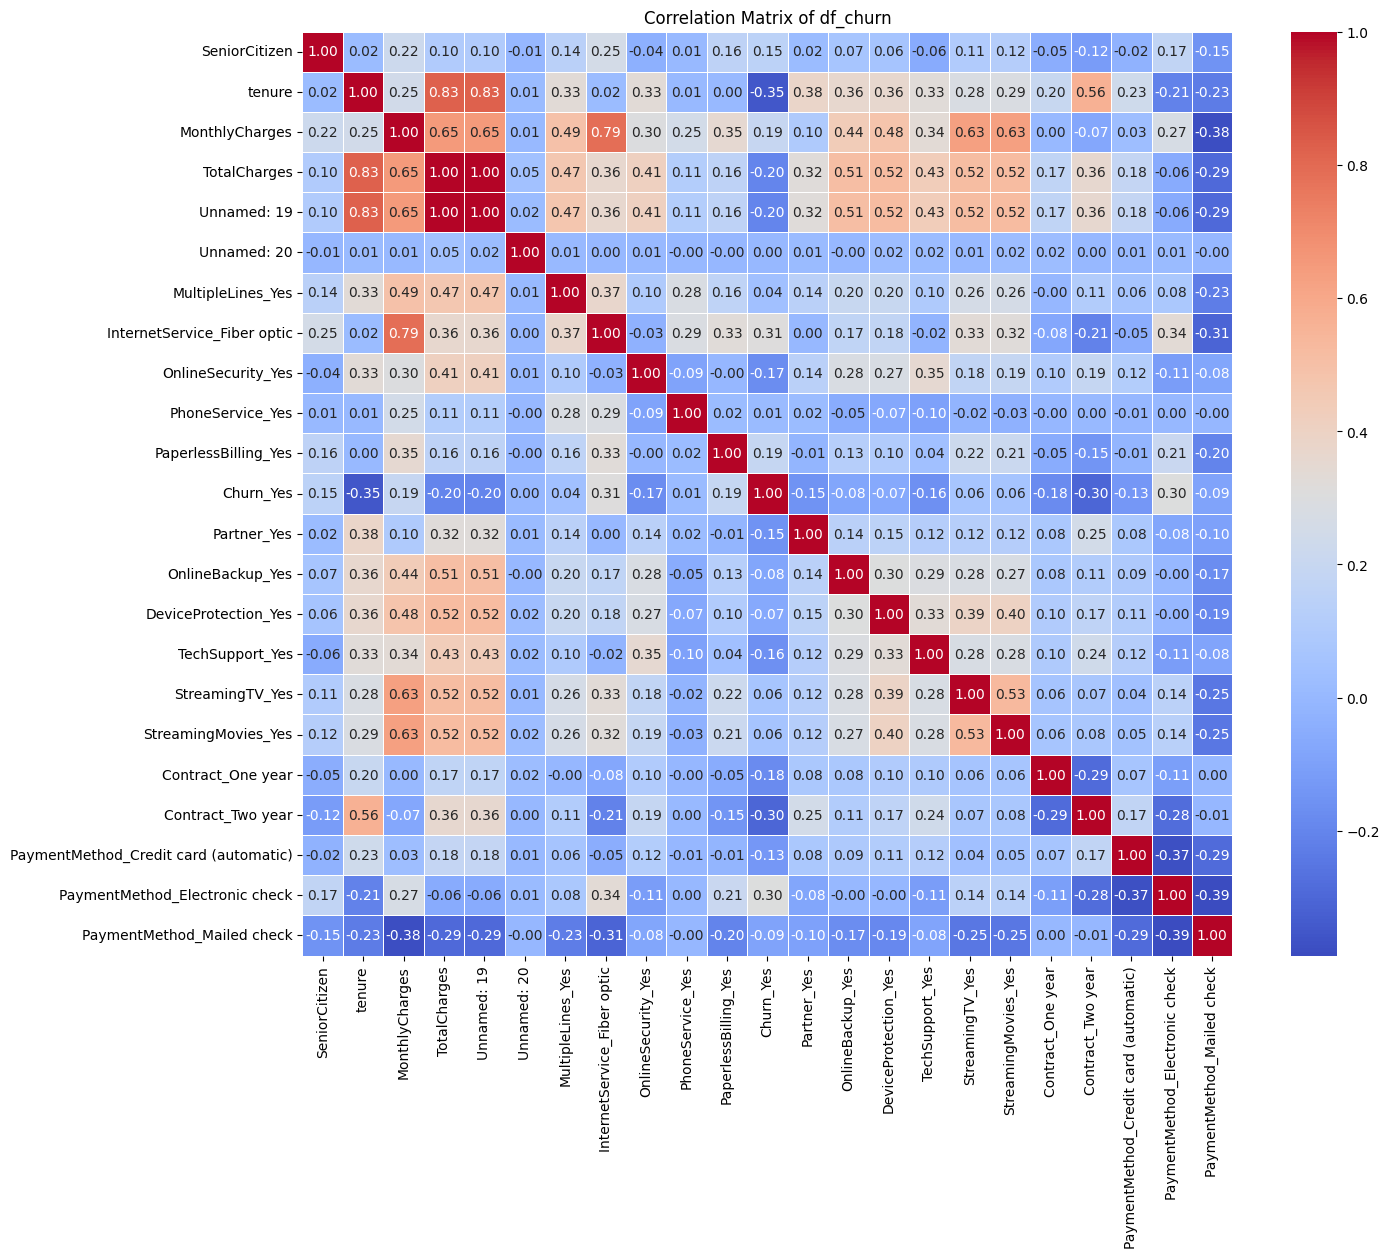

In [16]:
#calculate correlation matrix 
correlation_mat = df_churn.corr()

#Visualize correlation matrix 
plt.figure(figsize=(15, 12))

# Draw the heatmap with Seaborn
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of df_churn')
plt.show()

Insights from the correlation matrix 
1. Strong relation between 'tenure' and 'Total charges' with a high positive correlation of 0.83
2. Tenure and Churn _ Yes are negatively correlated meaning that the higher the tenure the less likely customers are to churn 
3. Churn_yes and Total Charges  are negatively correlated with -0.20 meaning that the higher the Total Charges the less likely customers would churn 
4. Features like MonthlyCharges, PaperlessBilling_Yes, and Contract_One year show notable correlations with Churn_Yes. These could be strong predictors.
5. This also shows that customers with Two year tenure are less likely to churn 
6. People who use internet fibre optics are more likely to churn. This shows that customers are not necessarily satissfied with fibere optics service 

In [17]:
# Dropping Total Charges to remove redundacy 
df_churn = df_churn.drop(columns=['TotalCharges'])

In [18]:
df_churn_scale = df_churn.copy()

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the columns
df_churn_scale[['MonthlyCharges', 'tenure']] = scaler.fit_transform(df_churn[['MonthlyCharges', 'tenure']])

df_churn_scale.head()



,SeniorCitizen,tenure,MonthlyCharges,Unnamed: 19,Unnamed: 20,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,PhoneService_Yes,PaperlessBilling_Yes,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,-1.161694,29.85,0,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
1,0,0.064303,-0.260878,1936.30,-46.8,False,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
2,0,-1.239504,-0.363923,107.70,0.45,False,False,True,True,True,...,True,False,False,False,False,False,False,False,False,True
3,0,0.512486,-0.747850,1903.50,-62.75,False,False,True,False,False,...,False,True,True,False,False,True,False,False,False,False
4,0,-1.239504,0.196178,141.40,10.25,False,True,False,True,True,...,False,False,False,False,False,False,False,False,True,False


In [19]:
# I am defining the features here X and Y 
X = df_churn_scale.drop(columns=['Churn_Yes'])  # Drop the target column from features
y = df_churn_scale['Churn_Yes'] # Target column 

#to check features used in X 
print("Features used for training:", X.columns.tolist())

# Split the dataset into training and testing sets
#X _train : features x for the training set 
#X_test : features for the test set 
#Y_test : target feature for the test set 
#Y_train : target feature for the test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'This is the size X_train: {X_train.shape}')
print(f'This is the size X_test: {X_test.shape}')
print(f'This is the size y_train: {y_train.shape}')
print(f'This is the size X_test: {y_test.shape}')


Features used for training: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Unnamed: 19', 'Unnamed: 20', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'PhoneService_Yes', 'PaperlessBilling_Yes', 'Partner_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
This is the size X_train: (5625, 21)
This is the size X_test: (1407, 21)
This is the size y_train: (5625,)
This is the size X_test: (1407,)


In [20]:
#Building model2 
df_churn_2 = df_churn.copy()

df_churn_2 = df_churn_2.drop(columns = ['Unnamed: 19','Unnamed: 20'])

#initialize sclaer 
scaler = StandardScaler()

# Fit and transform the columns
df_churn_2[['MonthlyCharges', 'tenure']] = scaler.fit_transform(df_churn[['MonthlyCharges', 'tenure']])

#check 
df_churn_2.head()


,SeniorCitizen,tenure,MonthlyCharges,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes,Partner_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,-1.161694,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,True,False
1,0,0.064303,-0.260878,False,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,True
2,0,-1.239504,-0.363923,False,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,True
3,0,0.512486,-0.747850,False,False,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False
4,0,-1.239504,0.196178,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False


Training the Model 


In [21]:
#Initializing the model 
model = LogisticRegression(random_state=42, max_iter=500)

# Training the model 
model.fit(X_train,y_train,)

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=42)

In [22]:
# I am defining the features here a and b 
a = df_churn_2.drop(columns=['Churn_Yes'])  # Drop the target column from features
b = df_churn_2['Churn_Yes'] # Target column 

#to check features used in a 
print("Features used for training:", a.columns.tolist())

# Split the dataset into training and testing sets
#a _train : features x for the training set 
#a_test : features for the test set 
#b_test : target feature for the test set 
#b_train : target feature for the test set 
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

print(f'This is the size a_train: {a_train.shape}')
print(f'This is the size a_test: {a_test.shape}')
print(f'This is the size b_train: {b_train.shape}')
print(f'This is the size b_test: {b_test.shape}')

Features used for training: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'PhoneService_Yes', 'PaperlessBilling_Yes', 'Partner_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
This is the size a_train: (5625, 19)
This is the size a_test: (1407, 19)
This is the size b_train: (5625,)
This is the size b_test: (1407,)


In [23]:
#building model 2 
model2 = LogisticRegression(random_state=42, max_iter=500)

# training model 2 
model2.fit(a_train,b_train,)

LogisticRegression(max_iter=500, random_state=42)

In [24]:
#Checking the Performace of the model 
#By predicting on the training set 
y_train_pred = model.predict(X_train)

# calculate accuracy 
train_accuracy = accuracy_score(y_train,y_train_pred)
print(train_accuracy)

#This is the accuracy on the trained data set 


0.8067555555555556


In [25]:
#Now we try it on the test set 
y_test_pred = model.predict(X_test)

#calculate accuracy 
test_accuracy = accuracy_score(y_test,y_test_pred)
print(test_accuracy)

0.7889125799573561


In [26]:
#Checking the Performace of the model2 
#By predicting on the training set 
b_train_pred = model2.predict(a_train)

# calculate accuracy 
train_accuracy = accuracy_score(b_train,b_train_pred)
print(train_accuracy)

#This is the accuracy on the trained data set 


0.8040888888888889


In [27]:
#Now we try it on the test set 
y_test_pred = model.predict(X_test)

#calculate accuracy 
test_accuracy = accuracy_score(y_test,y_test_pred)
print(test_accuracy)

0.7889125799573561


In [28]:
#Now we try it on the test set for model 2 
#Now we try it on the test set 
b_test_pred = model2.predict(a_test)

#calculate accuracy 
test_accuracy = accuracy_score(b_test,b_test_pred)
print(test_accuracy)

0.7974413646055437


In [29]:
#Generate a Classification Report 
print(f'This is a classification Report : \n', classification_report(y_test,y_test_pred))


# Generate a Classificatin Report for model2 
print(f' \n This is a classification Report for model 2  : \n', classification_report(b_test,b_test_pred))

This is a classification Report : 
               precision    recall  f1-score   support

       False       0.84      0.89      0.86      1033
        True       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

 
 This is a classification Report for model 2  : 
               precision    recall  f1-score   support

       False       0.84      0.90      0.87      1033
        True       0.65      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [30]:
#confusion Matrix of test set 
cm = confusion_matrix(y_test,y_test_pred)
print('This is the confusion matrix : \n', cm)

# confusion matrix of train set 
cm1 = confusion_matrix(y_train,y_train_pred)
print("\n This is the confusion matrix of train set: \n  ", cm1)

This is the confusion matrix : 
 [[916 117]
 [180 194]]

 This is the confusion matrix of train set: 
   [[3693  437]
 [ 650  845]]


In [31]:
#confusion Matrix of test set for model2 
cm2 = confusion_matrix(b_test,b_test_pred)
print('This is the confusion matrix : \n', cm2)

# confusion matrix of train set 
cm3 = confusion_matrix(b_train,b_train_pred)
print("\n This is the confusion matrix of train set: \n  ", cm3)

This is the confusion matrix : 
 [[926 107]
 [178 196]]

 This is the confusion matrix of train set: 
   [[3700  430]
 [ 672  823]]


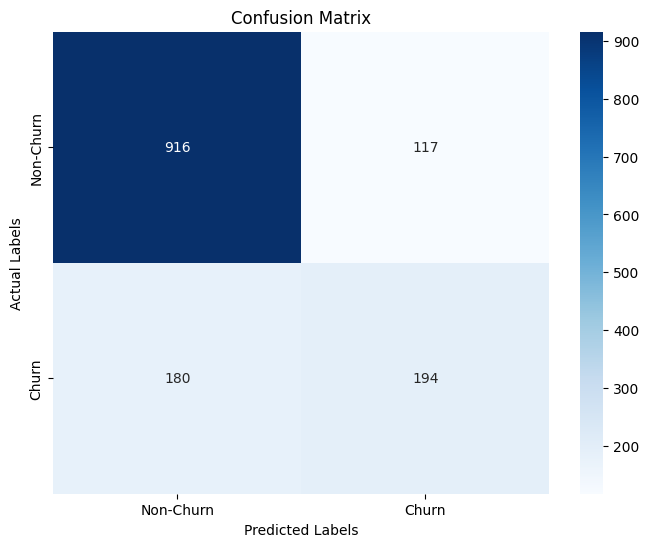

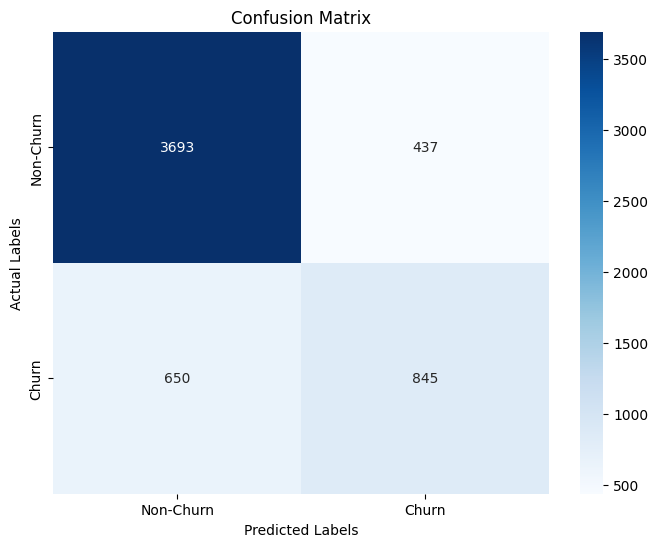

In [32]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


# Plot confusion matrix of the train data set 
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

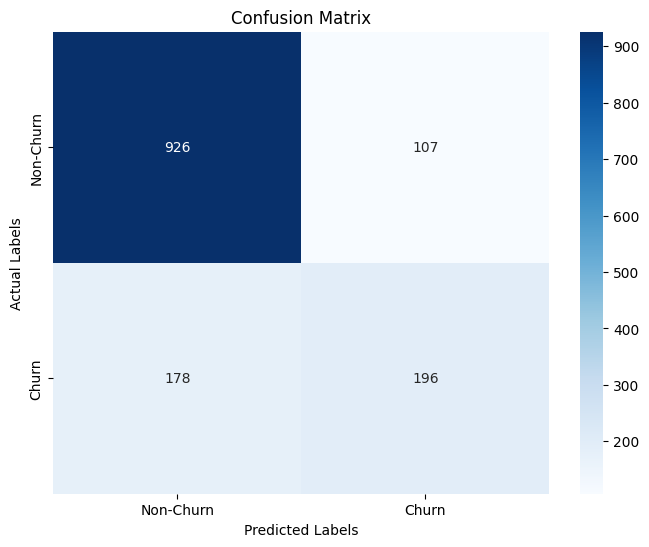

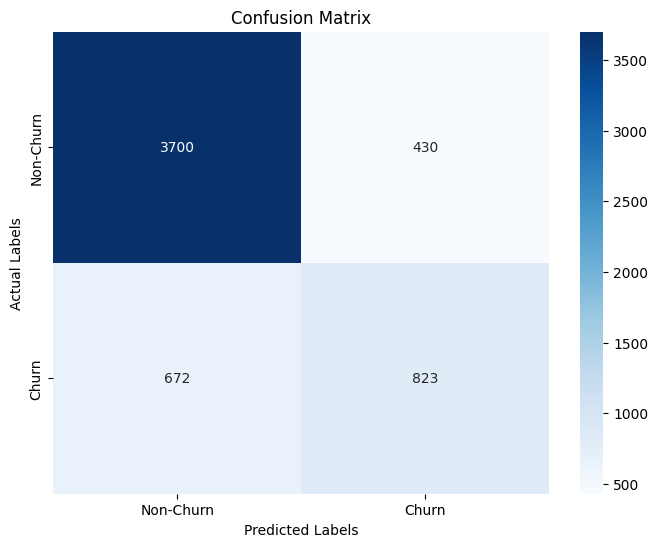

In [33]:
#plot confusion matrix for model 2 
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


# Plot confusion matrix of the train data set 
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

Insights 
1. Accuracy of 78% on the model on the test data  was achieved 
2. Based on the confusion matrix , the model has :
    1. A True Negative of 916 : The model was able to predict 916 non - churners correctly  from the test data set 
    2. A False Negative of 180 : The model was able to predict 180 non-churners incorrectly from the test data set 
    3. A false Positive of 117 : The model was able to predict 117 churners incorrectly 
    4. A True Negative of 194 : The model was able to predict 194 churners correctly 
3. Accuracy of 80% was achieved with model 2 
4. Based on the confusion matrix , the model has : 
    1. A True Negative of 926: The model was able to predict 926 non - churners correctly  from the test data set 
    2. A False Negative of 672 : The model was able to predict 180 non-churners incorrectly from the test data set 
    3. A false Positive of 109: The model was able to predict 117 churners incorrectly 
    4. A True Negative of 196 : The model was able to predict 194 churners correctly 

In [34]:

#ROC - AUC score just shows the trade-off between the TPR and FPR at various classification threshold 
# Calculate AUC score
y_test_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_probs)
print(f"ROC-AUC Score: {roc_auc:.2f}")


#TPR is the rate at which the model calls positives and how it predicts it correctly 
#FPR is the rate at which the model calls negatives when it is actually positive ( rate of false alarms )




ROC-AUC Score: 0.83


ROC-AUC Score: 0.83


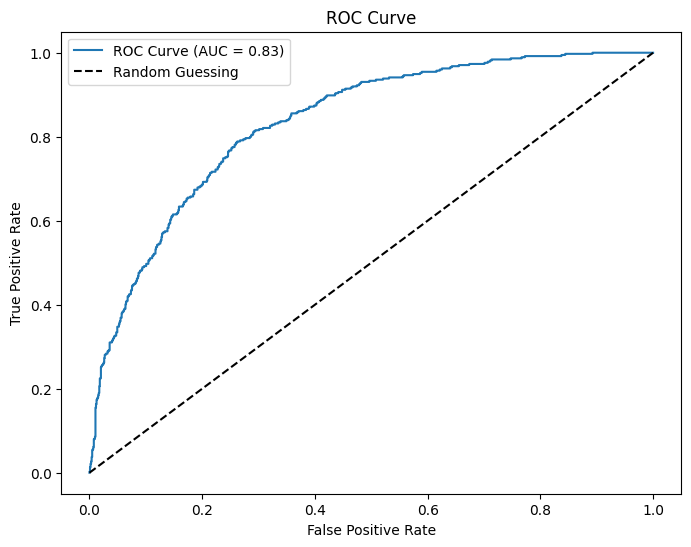

In [35]:

# Predict probabilities for the positive class (Churn = 1)
y_test_probs = model.predict_proba(X_test)[:, 1]

# Compute AUC score
roc_auc = roc_auc_score(y_test, y_test_probs)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
